## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
!pip install xgboost==2.0.3 -q --user

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
data = pd.read_csv('employee_promotion.csv')

## Data Overview

- Observations
- Sanity checks

In [6]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00000,8,0,49.00000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00000,4,0,60.00000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00000,7,0,50.00000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00000,10,0,50.00000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00000,2,0,73.00000,0


In [7]:
# check the shape of the data
row, col = data.shape
print(f'There are {row} rows and {col} columns in the dataset')

There are 54808 rows and 13 columns in the dataset


In [8]:
# Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [9]:
# Check for null values
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [10]:
# to check the data stats
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.00000,54808.00000,54808.00000,50684.00000,54808.00000,54808.00000,52248.00000,54808.00000
mean,39195.83063,1.25301,34.80392,3.32926,5.86551,0.02317,63.71224,0.08517
std,22586.58145,0.60926,7.66017,1.25999,4.26509,0.15045,13.52191,0.27914
min,1.00000,1.00000,20.00000,1.00000,1.00000,0.00000,39.00000,0.00000
25%,19669.75000,1.00000,29.00000,3.00000,3.00000,0.00000,51.00000,0.00000
50%,39225.50000,1.00000,33.00000,3.00000,5.00000,0.00000,60.00000,0.00000
75%,58730.50000,1.00000,39.00000,4.00000,7.00000,0.00000,77.00000,0.00000
max,78298.00000,10.00000,60.00000,5.00000,37.00000,1.00000,99.00000,1.00000


In [11]:
# to get the unique values in the dataset
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the distribution of average training score of  employee ?
2. How is the distribution age of  employee ?
3. How does the change in length of service (`length_of_service`) vary by the employee's promotion status (`is_promoted`)?
4. How does the previous rating(`previous_year_rating`) vary by the employee's promotion status (`is_promoted`)?
5. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

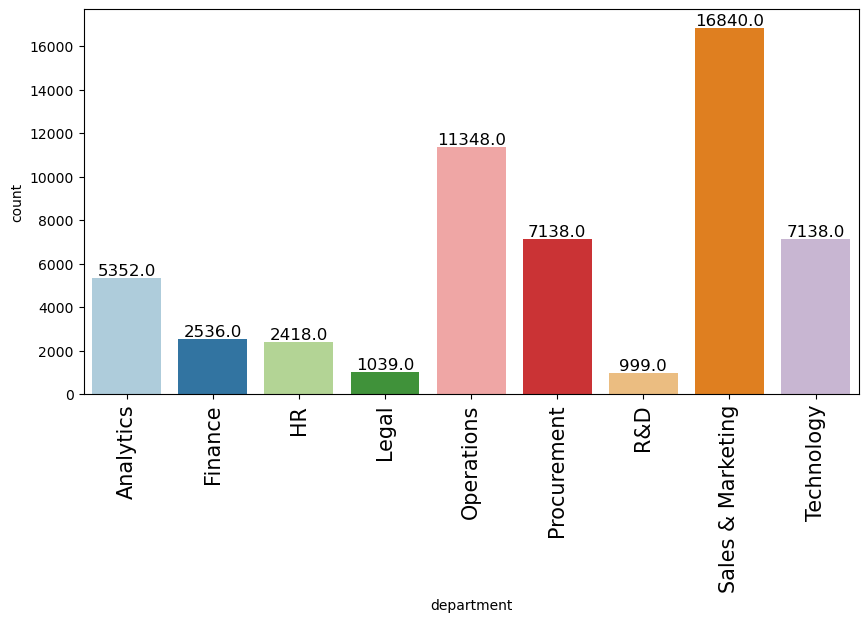

In [16]:
labeled_barplot(data, 'department')

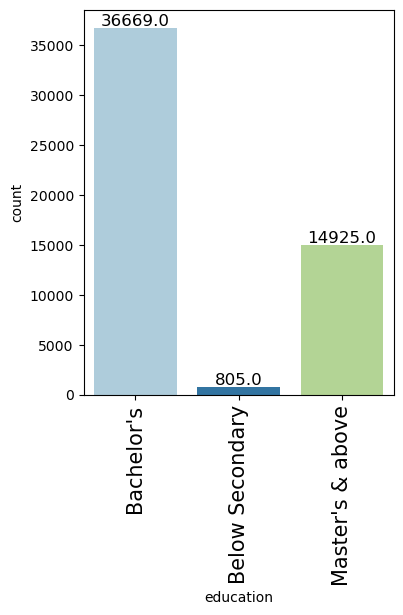

In [17]:
labeled_barplot(data, 'education')

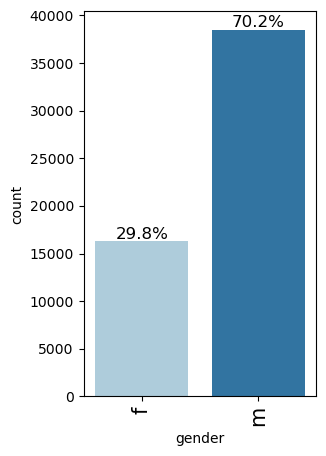

In [18]:
labeled_barplot(data, 'gender', perc= True)

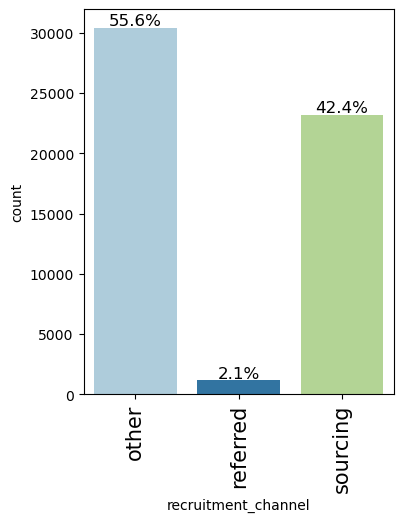

In [19]:
labeled_barplot(data, 'recruitment_channel', perc=True)

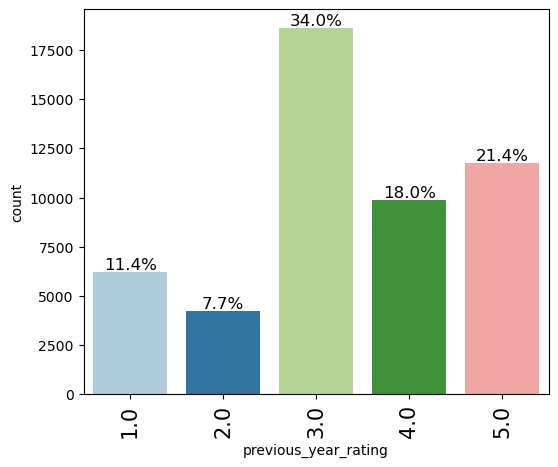

In [20]:
labeled_barplot(data, 'previous_year_rating', True)

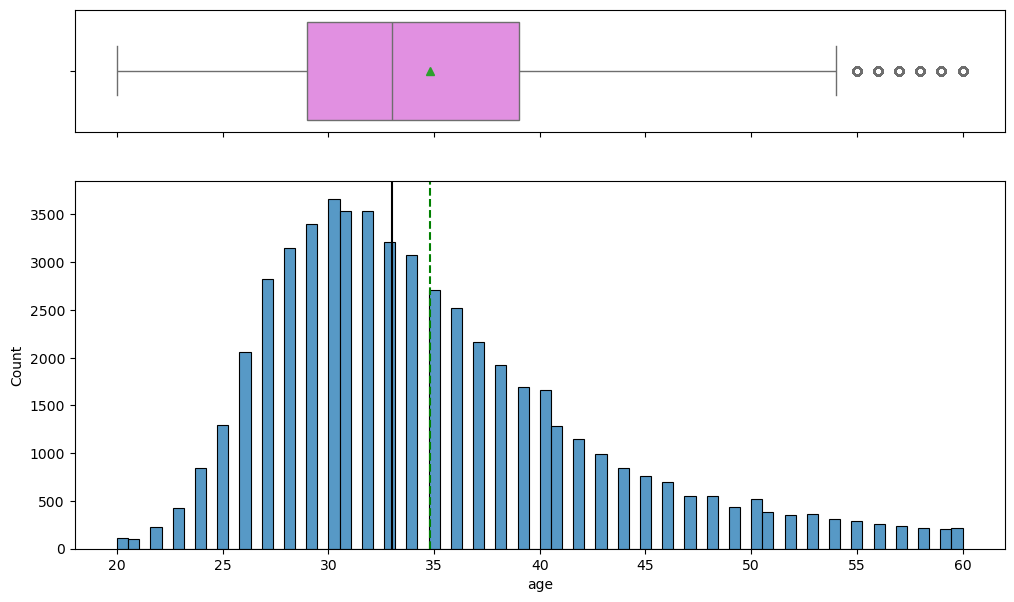

In [21]:
histogram_boxplot(data, 'age')

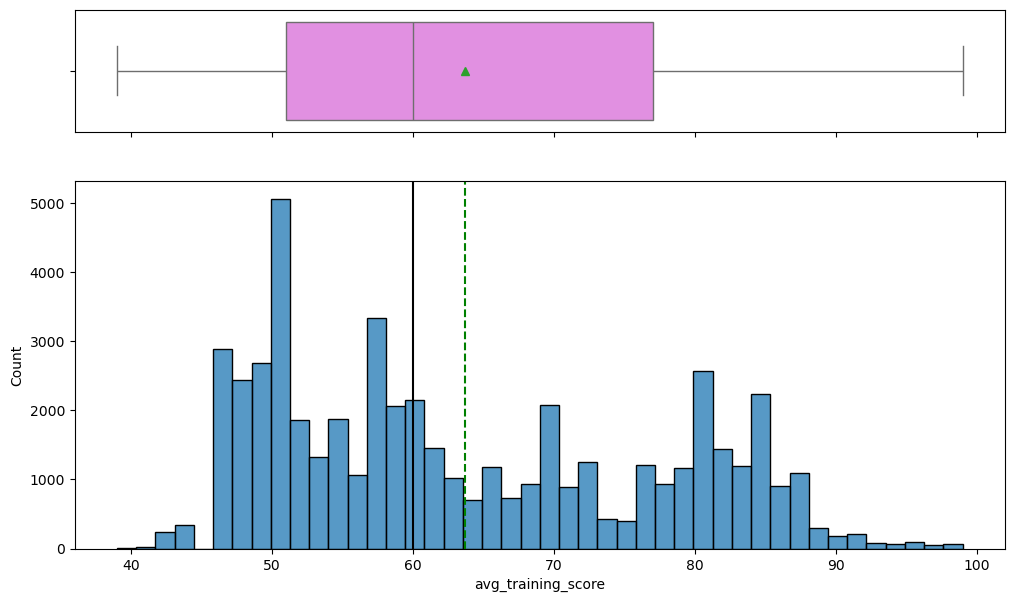

In [22]:
histogram_boxplot(data, 'avg_training_score')

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


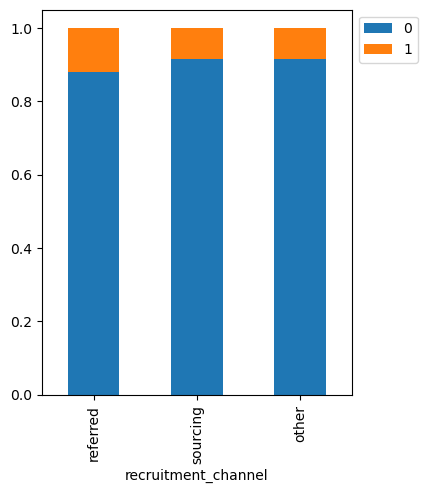

In [23]:
stacked_barplot(data, 'recruitment_channel', 'is_promoted')

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


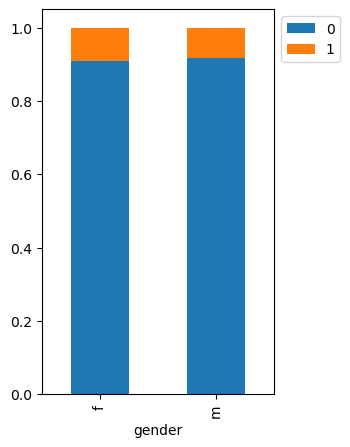

In [24]:
stacked_barplot(data, 'gender', 'is_promoted')

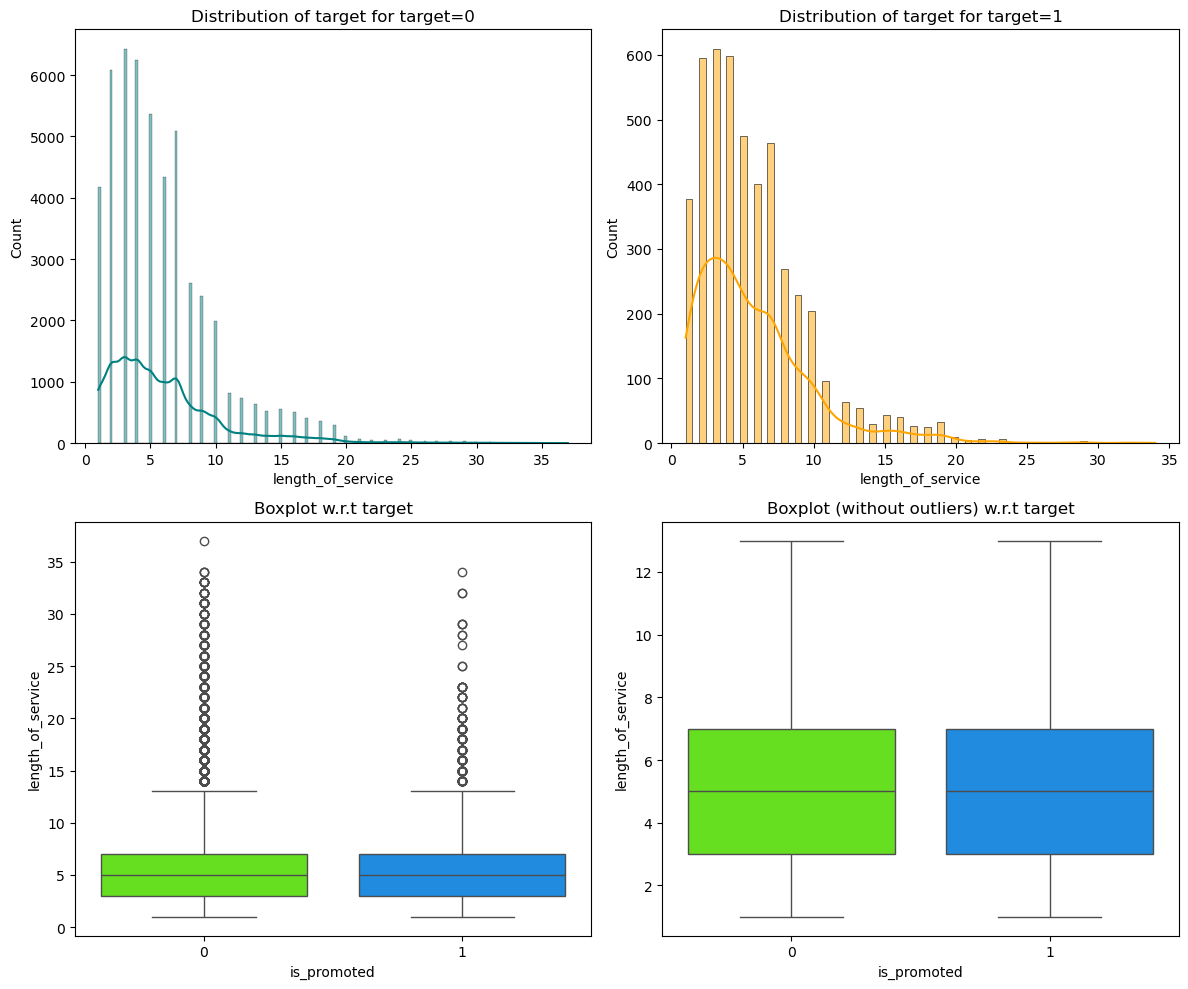

In [25]:
distribution_plot_wrt_target(data, 'length_of_service', 'is_promoted')

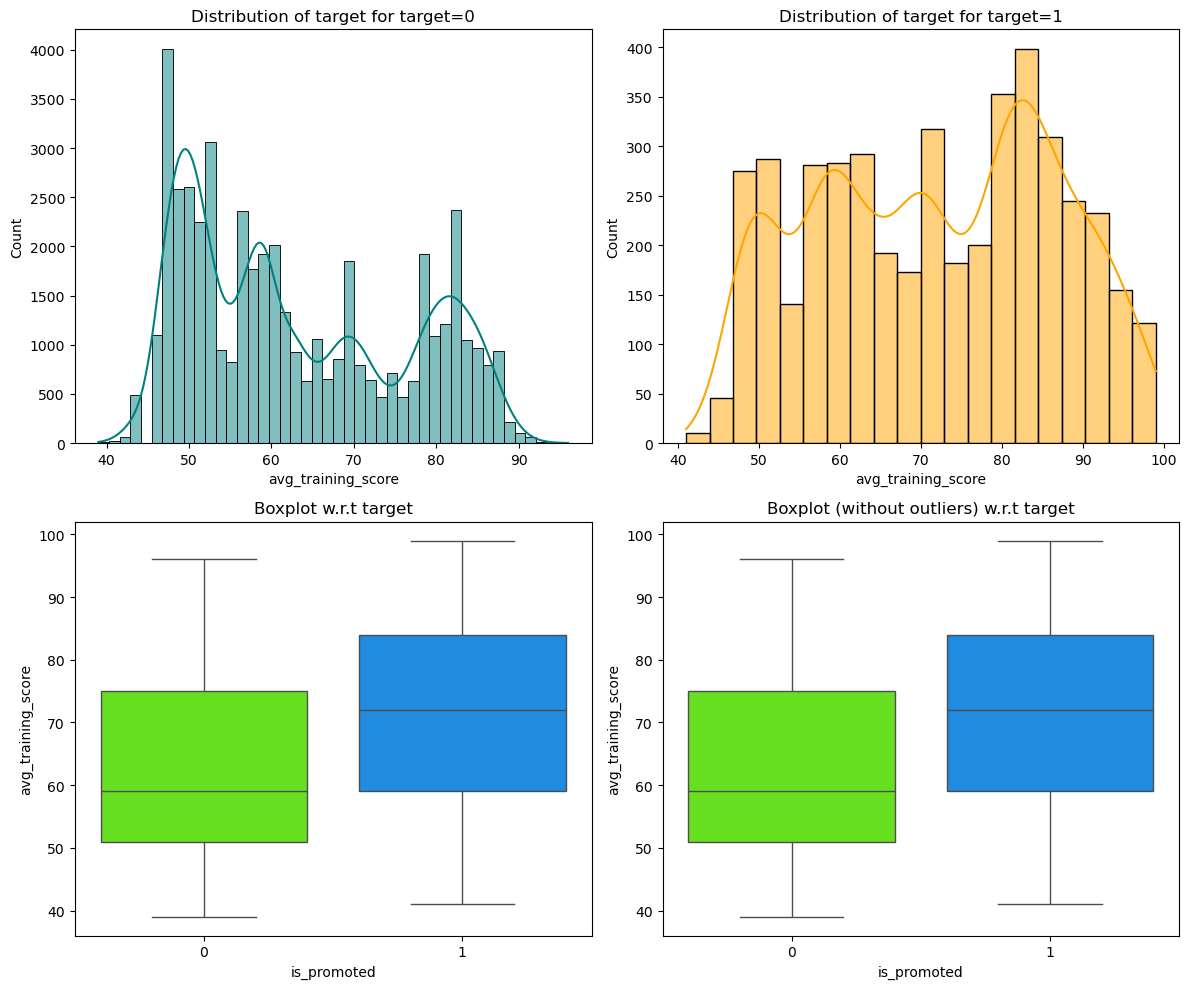

In [26]:
distribution_plot_wrt_target(data, 'avg_training_score', 'is_promoted')

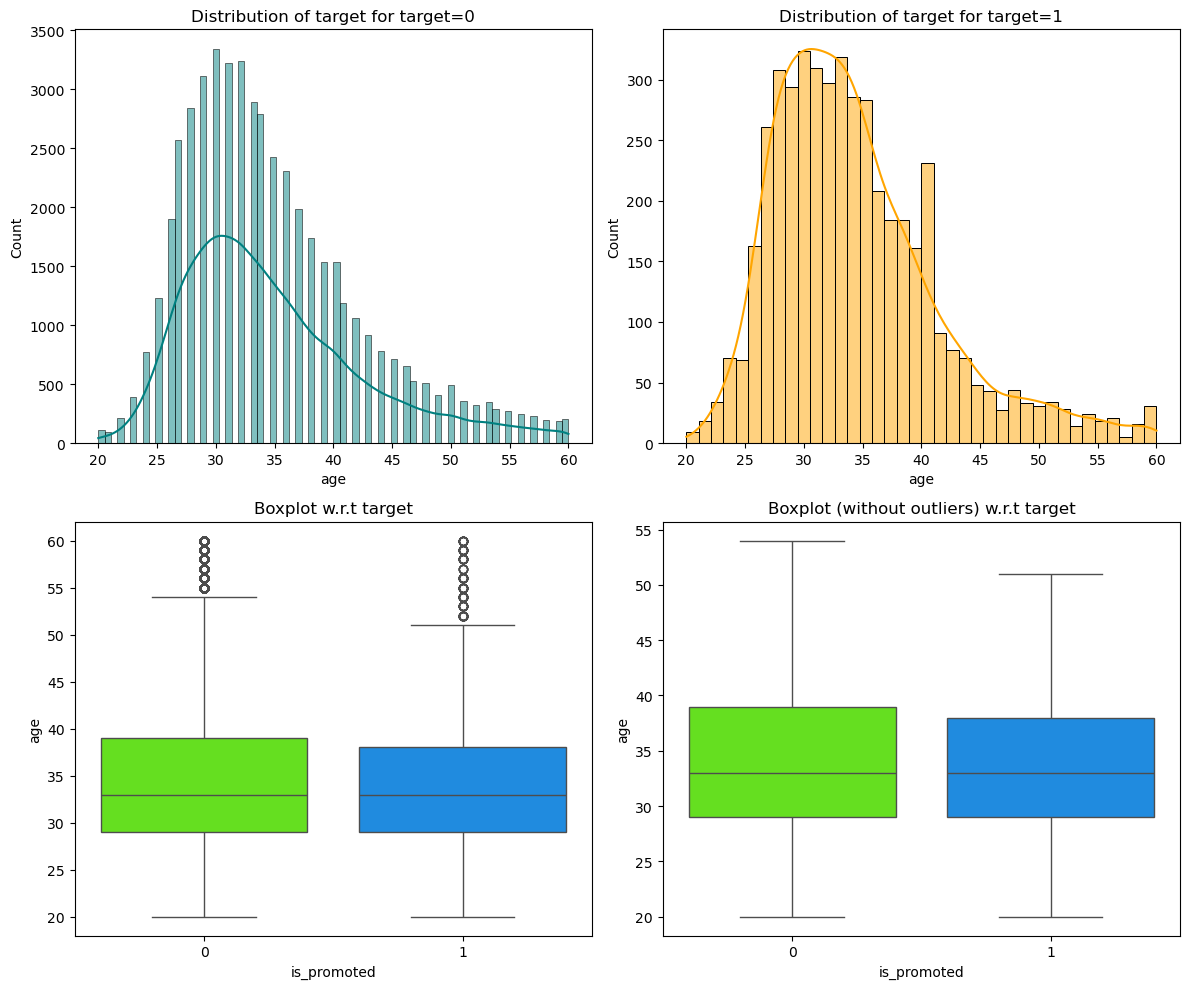

In [27]:
distribution_plot_wrt_target(data, 'age', 'is_promoted')

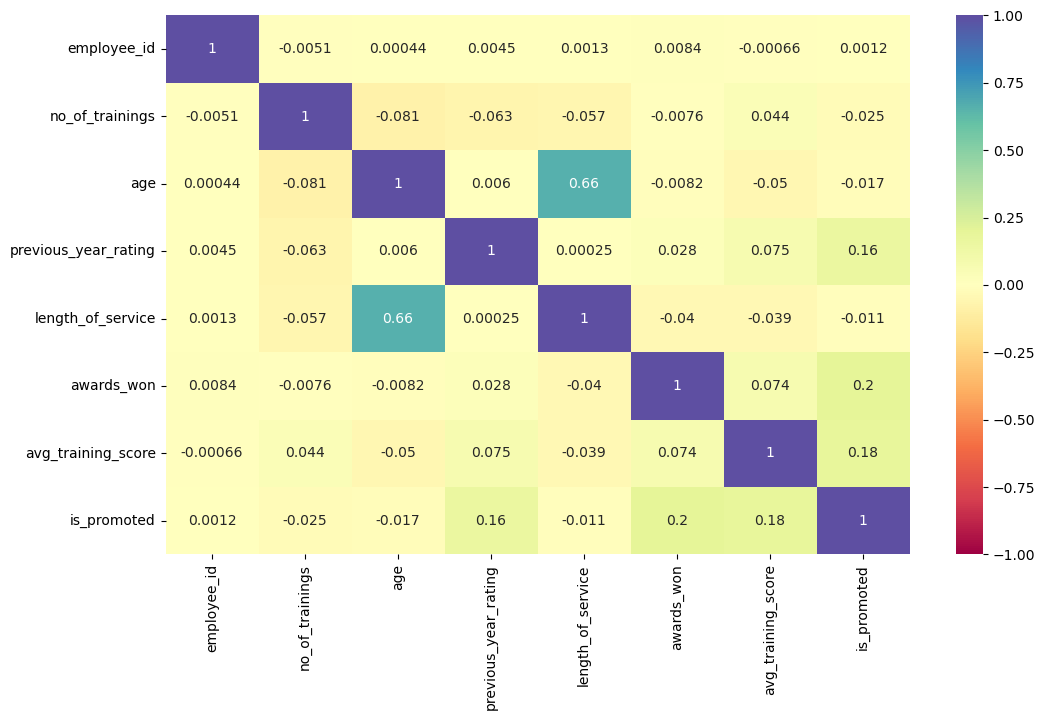

In [28]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral"
)
plt.show()

## Data Pre-processing

In [29]:
data = pd.read_csv('employee_promotion.csv')

In [30]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00000,8,0,49.00000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00000,4,0,60.00000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00000,7,0,50.00000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00000,10,0,50.00000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00000,2,0,73.00000,0


In [31]:

data.drop(['employee_id', 'region'], axis=1, inplace= True)

data.replace({'gender':{'f': 0, 'm': 1}}, inplace=True)

data.replace({'education': {'Below Secondary': 0, "Bachelor's": 1, "Master's & above": 2}}, inplace=True)

data.replace({'recruitment_channel': {'sourcing': 0, 'referred': 1, 'other': 2}}, inplace=True)

dept = {'Sales & Marketing': 0, 'Operations': 1, 'Technology': 2, 'Analytics': 3, 'R&D': 4, 'Procurement': 5,  'Finance': 6, 'HR': 7, 'Legal': 8}
data["department"] = data["department"].map(dept)

In [32]:
# check for duplicates
data[data.duplicated() == True]

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
1100,8,1.00000,1,0,1,30,NaN,1,0,63.00000,0
1451,0,1.00000,1,0,1,37,3.00000,4,0,50.00000,0
1823,0,1.00000,1,2,1,38,3.00000,4,0,49.00000,0
1878,0,1.00000,1,0,1,29,5.00000,2,0,50.00000,0
1903,1,2.00000,1,0,1,35,2.00000,7,0,53.00000,0
...,...,...,...,...,...,...,...,...,...,...,...
54765,0,1.00000,1,2,2,33,1.00000,3,0,48.00000,0
54773,6,1.00000,1,2,1,23,NaN,1,0,NaN,0
54774,1,1.00000,1,0,1,34,1.00000,5,0,57.00000,0
54780,1,1.00000,0,0,1,39,5.00000,7,0,60.00000,0


In [33]:
data.drop_duplicates(inplace=True)

In [34]:
# cat_list = data.select_dtypes(include='object').columns.to_list()
cat_list = ['department', 'education', 'recruitment_channel', 'gender']
data[cat_list] = data[['department', 'education', 'recruitment_channel', 'gender']].astype('category')

In [35]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,0,2.00000,0,0,1,35,5.00000,8,0,49.00000,0
1,1,1.00000,1,2,1,30,5.00000,4,0,60.00000,0
2,0,1.00000,1,0,1,34,3.00000,7,0,50.00000,0
3,0,1.00000,1,2,2,39,1.00000,10,0,50.00000,0
4,2,1.00000,1,2,1,45,3.00000,2,0,73.00000,0


In [36]:
data.shape

(50866, 11)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50866 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            50866 non-null  category
 1   education             48589 non-null  category
 2   gender                50866 non-null  category
 3   recruitment_channel   50866 non-null  category
 4   no_of_trainings       50866 non-null  int64   
 5   age                   50866 non-null  int64   
 6   previous_year_rating  47799 non-null  float64 
 7   length_of_service     50866 non-null  int64   
 8   awards_won            50866 non-null  int64   
 9   avg_training_score    48518 non-null  float64 
 10  is_promoted           50866 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 3.3 MB


In [38]:
data_final = data.copy()

In [39]:
X = data_final.drop('is_promoted', axis=1)
y = data_final['is_promoted']

# Train and test dataset
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size = 0.20, stratify = y
) 

# Validation 
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp
)

print(X_train.shape, X_test.shape, X_val.shape)

(30519, 10) (10174, 10) (10173, 10)


In [40]:
from sklearn.impute import SimpleImputer

# Fiil missing values

cat_col = ['education']
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_col] = cat_imputer.fit_transform(X_train[cat_col])
X_val[cat_col] = cat_imputer.transform(X_val[cat_col])
X_test[cat_col] = cat_imputer.transform(X_test[cat_col])


num_cols = ['previous_year_rating', 'avg_training_score']
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [41]:
X_train

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
15001,1,1.00000,0,2,1,31,4.00000,8,0,64.00000
26022,3,1.00000,1,2,1,29,3.00000,8,0,87.00000
11629,0,2.00000,1,2,1,49,4.00000,19,0,49.00000
20110,0,1.00000,0,0,1,39,1.00000,9,0,48.00000
2565,5,1.00000,0,0,1,32,3.00000,7,0,69.00000
...,...,...,...,...,...,...,...,...,...,...
46298,0,1.00000,0,2,1,42,3.00000,6,0,51.00000
28172,3,1.00000,1,0,2,28,3.00000,1,0,93.00000
8784,0,2.00000,1,2,1,38,3.00000,2,0,49.00000
41362,0,1.00000,1,0,2,31,1.00000,6,0,47.00000


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of eligible employees are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that an employee is not due for promotion, when he actually is, it will reducelure when there will be a failure, it will increase the maintenance cost.

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [43]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("xgb", XGBClassifier(random_state=1,enable_categorical=True)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.8294964028776979
Random forest: 0.9485611510791367
GBM: 0.30971223021582733
Adaboost: 0.20431654676258992
dtree: 1.0
xgb: 0.39136690647482014

Validation Performance:

Bagging: 0.3099352051835853
Random forest: 0.28293736501079914
GBM: 0.27429805615550756
Adaboost: 0.183585313174946
dtree: 0.357451403887689
xgb: 0.31641468682505397


In [44]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.8295, Validation Score: 0.3099, Difference: 0.5196
Random forest: Training Score: 0.9486, Validation Score: 0.2829, Difference: 0.6656
GBM: Training Score: 0.3097, Validation Score: 0.2743, Difference: 0.0354
Adaboost: Training Score: 0.2043, Validation Score: 0.1836, Difference: 0.0207
dtree: Training Score: 1.0000, Validation Score: 0.3575, Difference: 0.6425
xgb: Training Score: 0.3914, Validation Score: 0.3164, Difference: 0.0750


### Model Building with Undersampled data

In [52]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [53]:
X_train_un.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64

In [56]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("xgb", XGBClassifier(random_state=1,enable_categorical=True)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9615107913669064
Random forest: 0.9971223021582734
GBM: 0.6564748201438849
Adaboost: 0.6694244604316547
dtree: 0.9946043165467626
xgb: 0.8327338129496403

Validation Performance:

Bagging: 0.5971922246220303
Random forest: 0.6479481641468683
GBM: 0.6144708423326134
Adaboost: 0.6382289416846653
dtree: 0.6436285097192225
xgb: 0.6382289416846653


### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

### Gradient Boosting Model Tuning

In [85]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.3924460431654676:
CPU times: total: 6.17 s
Wall time: 1min


In [86]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, random_state=1,
                           subsample=0.9)

In [87]:
# Checking model's performance on training set
tuned_gbm_t = model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
tuned_gbm_t

,Accuracy,Recall,Precision,F1
0,0.92834,0.22626,0.94586,0.36517


In [88]:
# Checking model's performance on validation set
tuned_gbm_v = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
tuned_gbm_v

,Accuracy,Recall,Precision,F1
0,0.92657,0.20842,0.93237,0.34069


#### Undersampling

In [89]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 1, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.6564748201438849:
CPU times: total: 1.47 s
Wall time: 15.2 s


In [90]:
tuned_gbm_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=1,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.7)

In [91]:
# Checking model's performance on training set
tuned_gbm_un_t = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
tuned_gbm_un_t

,Accuracy,Recall,Precision,F1
0,0.72158,0.68921,0.73692,0.71227


In [92]:
# Checking model's performance on validation set
tuned_gbm_un_v = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
tuned_gbm_un_v

,Accuracy,Recall,Precision,F1
0,0.73115,0.66307,0.20217,0.30987


### AdaBoosting Model Tuning

In [100]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
   "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.29064748201438845:
CPU times: total: 1.88 s
Wall time: 30.8 s


In [102]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [103]:
# Checking model's performance on training set
tuned_adb_t = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
tuned_adb_t

,Accuracy,Recall,Precision,F1
0,0.93620,0.30324,0.98828,0.46408


In [104]:
# Checking model's performance on validation set
tuned_adb_v = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
tuned_adb_v

,Accuracy,Recall,Precision,F1
0,0.93247,0.26134,0.98776,0.41332


#### Undersampling

In [106]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
   "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.6237410071942445:
CPU times: total: 453 ms
Wall time: 6.46 s


In [109]:
tuned_adb_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.5,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=100, random_state=1)

In [110]:
# Checking model's performance on training set
tuned_adb_un_t = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
tuned_adb_un_t

,Accuracy,Recall,Precision,F1
0,0.75000,0.65468,0.80889,0.72366


In [111]:
# Checking model's performance on validation set
tuned_adb_un_v = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
tuned_adb_un_v

,Accuracy,Recall,Precision,F1
0,0.80085,0.60475,0.25225,0.35601


## Decision Tree

#### Sample tuning method for Decision tree with original data

In [58]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.20359712230215826:


In [59]:
# Creating new pipeline with best parameters
dtree_tuned = DecisionTreeClassifier(
    random_state=1,  max_depth=5, min_samples_leaf=7, max_leaf_nodes=15, min_impurity_decrease=0.0001
)

# Fit the model on training data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [60]:
# Calculating different metrics on train set
tuned_dtr3_t = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
tuned_dtr3_t

,Accuracy,Recall,Precision,F1
0,0.92247,0.19820,0.80087,0.31776


In [61]:
# Calculating different metrics on validation set
tuned_dtr3_v = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
tuned_dtr3_v

,Accuracy,Recall,Precision,F1
0,0.91989,0.17819,0.75342,0.28821


#### Sample tuning method for Decision tree with undersampled data

In [62]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.6205035971223022:


In [63]:
# Creating new pipeline with best parameters
dtree_tuned_un = DecisionTreeClassifier(
    random_state=1, max_depth=11, min_samples_leaf=1, max_leaf_nodes=15, min_impurity_decrease=0.001
)

# Fit the model on training data
dtree_tuned_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [64]:
# Calculating different metrics on train set
tuned_dtr3_un_t = model_performance_classification_sklearn(
    dtree_tuned_un, X_train_un, y_train_un
)
tuned_dtr3_un_t

,Accuracy,Recall,Precision,F1
0,0.70486,0.61511,0.74967,0.67576


In [65]:
# Calculating different metrics on validation set
tuned_dtr3_un_v = model_performance_classification_sklearn(dtree_tuned_un, X_val, y_val)
tuned_dtr3_un_v

,Accuracy,Recall,Precision,F1
0,0.77175,0.58531,0.21855,0.31826


### Bagging Classifier Model Tuning

In [66]:
%%time

# Choose the type of classifier. 
bagging_model = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_samples': [0.8,0.9,1],
                'max_features': [0.7,0.8,0.9],
                'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(bagging_model, parameters, scoring=scorer,cv=5)
grid_cv = grid_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tuned_bag = grid_cv.best_estimator_


# Fit the best algorithm to the data.
tuned_bag.fit(X_train, y_train)

CPU times: total: 55.1 s
Wall time: 2min 56s


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

In [67]:
# Checking model's performance on training set
tuned_bag_t=model_performance_classification_sklearn(tuned_bag,X_train,y_train)
tuned_bag_t

,Accuracy,Recall,Precision,F1
0,0.98624,0.85288,0.99538,0.91864


In [68]:
# Checking model's performance on validation set
tuned_bag_v=model_performance_classification_sklearn(tuned_bag,X_val,y_val)
tuned_bag_v

,Accuracy,Recall,Precision,F1
0,0.92647,0.30130,0.73421,0.42726


#### Undersampling

In [112]:
%%time

# Choose the type of classifier. 
bagging_model = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_samples': [0.8,0.9,1],
                'max_features': [0.7,0.8,0.9],
                'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(bagging_model, parameters, scoring=scorer,cv=5)

#Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_un, y_train_un)


# Set the clf to the best combination of parameters
tuned_bag_un = grid_cv.best_estimator_


# Fit the best algorithm to the data.
tuned_bag_un.fit(X_train_un, y_train_un)

CPU times: total: 3.91 s
Wall time: 50 s


BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

In [113]:
# Checking model's performance on training set
tuned_bag_un_t=model_performance_classification_sklearn(tuned_bag_un,X_train_un,y_train_un)
tuned_bag_un_t

,Accuracy,Recall,Precision,F1
0,0.50000,1.00000,0.50000,0.66667


In [114]:
# Checking model's performance on validation set
tuned_bag_un_v=model_performance_classification_sklearn(tuned_bag_un,X_val,y_val)
tuned_bag_un_v

,Accuracy,Recall,Precision,F1
0,0.09103,1.00000,0.09103,0.16686


### Random Forest Classifier Model Tuning

In [69]:
# Choose the type of classifier. 
rf_model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(rf_model, parameters, scoring=scorer,cv=5)
grid_cv = grid_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tuned_rf = grid_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [70]:
# Checking model's performance on training set
tuned_rf_t=model_performance_classification_sklearn(tuned_rf,X_train,y_train)
tuned_rf_t

,Accuracy,Recall,Precision,F1
0,0.96828,0.65252,0.99890,0.78938


In [71]:
# Checking model's performance on validation set
tuned_rf_v=model_performance_classification_sklearn(tuned_rf,X_val,y_val)
tuned_rf_v

,Accuracy,Recall,Precision,F1
0,0.92795,0.26566,0.82274,0.40163


#### undersampling

In [72]:
# Choose the type of classifier. 
rf_model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(rf_model, parameters, scoring=scorer,cv=5)

#Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
tuned_rf_un = grid_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.4, n_estimators=25, random_state=1)

In [73]:
# Checking model's performance on training set
tuned_rf_un_t=model_performance_classification_sklearn(tuned_rf_un,X_train_un,y_train_un)
tuned_rf_un_t

,Accuracy,Recall,Precision,F1
0,0.91403,0.89460,0.93076,0.91233


In [74]:
# Checking model's performance on validation set
tuned_rf_un_v=model_performance_classification_sklearn(tuned_rf_un,X_val,y_val)
tuned_rf_un_v

,Accuracy,Recall,Precision,F1
0,0.72643,0.65011,0.19667,0.30198


### XGBoost Model Tuning

In [76]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss',enable_categorical=True)

#Parameter grid to pass in GridSearchCV
param_grid={
               'n_estimators':np.arange(50,110,25),
                'scale_pos_weight':[1,2,5],
                'learning_rate':[0.01,0.1,0.05],
                'gamma':[1,3],
                'subsample':[0.7,0.9]
            }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters are {'gamma': 1, 'learning_rate': 0.1, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 0.7} with CV score=0.45935251798561155:
CPU times: total: 11.3 s
Wall time: 34.9 s


In [77]:
# building model with best parameters
tuned_xgb = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=5,
    subsample=0.7,
    learning_rate=0.1,
    gamma=1,
    enable_categorical=True
)

# Fit the model on training data
tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [78]:
# Calculating different metrics on train set
tuned_xgb_t = model_performance_classification_sklearn(
    tuned_xgb, X_train, y_train
)
tuned_xgb_t

,Accuracy,Recall,Precision,F1
0,0.92100,0.52878,0.57176,0.54943


In [79]:
# Calculating different metrics on validation set
tuned_xgb_v = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
tuned_xgb_v

,Accuracy,Recall,Precision,F1
0,0.90868,0.45572,0.49823,0.47603


#### undersampling

In [81]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss',enable_categorical=True)

#Parameter grid to pass in GridSearchCV
param_grid={
               'n_estimators':np.arange(50,110,25),
                'scale_pos_weight':[1,2,5],
                'learning_rate':[0.01,0.1,0.05],
                'gamma':[1,3],
                'subsample':[0.7,0.9]
            }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters are {'gamma': 1, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.7} with CV score=1.0:
CPU times: total: 2.61 s
Wall time: 9.87 s


In [82]:
# building model with best parameters
tuned_xgb_un = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    subsample=0.7,
    learning_rate=0.01,
    gamma=1,
    enable_categorical=True,
)

# Fit the model on training data
tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [83]:
# Calculating different metrics on train set
tuned_xgb_un_t = model_performance_classification_sklearn(
    tuned_xgb_un, X_train_un, y_train_un
)
tuned_xgb_un_t

,Accuracy,Recall,Precision,F1
0,0.50504,1.00000,0.50253,0.66891


In [84]:
# Calculating different metrics on validation set
tuned_xgb_un_v = model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
tuned_xgb_un_v

,Accuracy,Recall,Precision,F1
0,0.09771,1.00000,0.09164,0.16789


## Model Comparison and Final Model Selection

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_t.T,

        tuned_gbm_un_t.T,
        tuned_adb_t.T,

        tuned_adb_un_t.T,        
        tuned_dtr3_t.T,

        tuned_dtr3_un_t.T,
        tuned_bag_t.T,
        tuned_bag_un_t.T,
        tuned_rf_t.T,

        tuned_rf_un_t.T,           
        tuned_xgb_t.T,

        tuned_xgb_un_t.T,        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradBoost",
    "GradBoost under",
    "AdaBoost",
    "AdaBoost under",
    "Dtree",
    "Dtree under",
    "Bagging",
    "Bagging under",
    "RForest",
    "RForest under",    
    "XGBoost",
    "XGBoost under", 
]
print("Trained model- over means: oversampled data, under means: undersampled data")
print("Training performance comparison:")
models_train_comp_df

Trained model- over means: oversampled data, under means: undersampled data
Training performance comparison:


,GradBoost,GradBoost under,AdaBoost,AdaBoost under,Dtree,Dtree under,Bagging,Bagging under,RForest,RForest under,XGBoost,XGBoost under
Accuracy,0.92834,0.72158,0.93620,0.75000,0.92247,0.70486,0.98624,0.50000,0.96828,0.91403,0.92100,0.50504
Recall,0.22626,0.68921,0.30324,0.65468,0.19820,0.61511,0.85288,1.00000,0.65252,0.89460,0.52878,1.00000
Precision,0.94586,0.73692,0.98828,0.80889,0.80087,0.74967,0.99538,0.50000,0.99890,0.93076,0.57176,0.50253
F1,0.36517,0.71227,0.46408,0.72366,0.31776,0.67576,0.91864,0.66667,0.78938,0.91233,0.54943,0.66891


In [116]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_v.T,
        tuned_gbm_un_v.T,
        tuned_adb_v.T,
        tuned_adb_un_v.T,        
        tuned_dtr3_v.T,
        tuned_dtr3_un_v.T,
        tuned_bag_v.T,
        tuned_bag_un_v.T,       
        tuned_rf_v.T,
        tuned_rf_un_v.T,           
        tuned_xgb_v.T,
        tuned_xgb_un_v.T,        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradBoost",
    "GradBoost under",
    "AdaBoost",
    "AdaBoost under",
    "Dtree",
    "Dtree under",
    "Bagging",
    "Bagging under",
    "RForest",
    "RForest under",    
    "XGBoost",
    "XGBoost under", 
]
print("Trained model- over means: oversampled, under means: undersampled data")
print("Training performance comparison:")
models_train_comp_df

Trained model- over means: oversampled, under means: undersampled data
Training performance comparison:


,GradBoost,GradBoost under,AdaBoost,AdaBoost under,Dtree,Dtree under,Bagging,Bagging under,RForest,RForest under,XGBoost,XGBoost under
Accuracy,0.92657,0.73115,0.93247,0.80085,0.91989,0.77175,0.92647,0.09103,0.92795,0.72643,0.90868,0.09771
Recall,0.20842,0.66307,0.26134,0.60475,0.17819,0.58531,0.30130,1.00000,0.26566,0.65011,0.45572,1.00000
Precision,0.93237,0.20217,0.98776,0.25225,0.75342,0.21855,0.73421,0.09103,0.82274,0.19667,0.49823,0.09164
F1,0.34069,0.30987,0.41332,0.35601,0.28821,0.31826,0.42726,0.16686,0.40163,0.30198,0.47603,0.16789


### Test set final performance

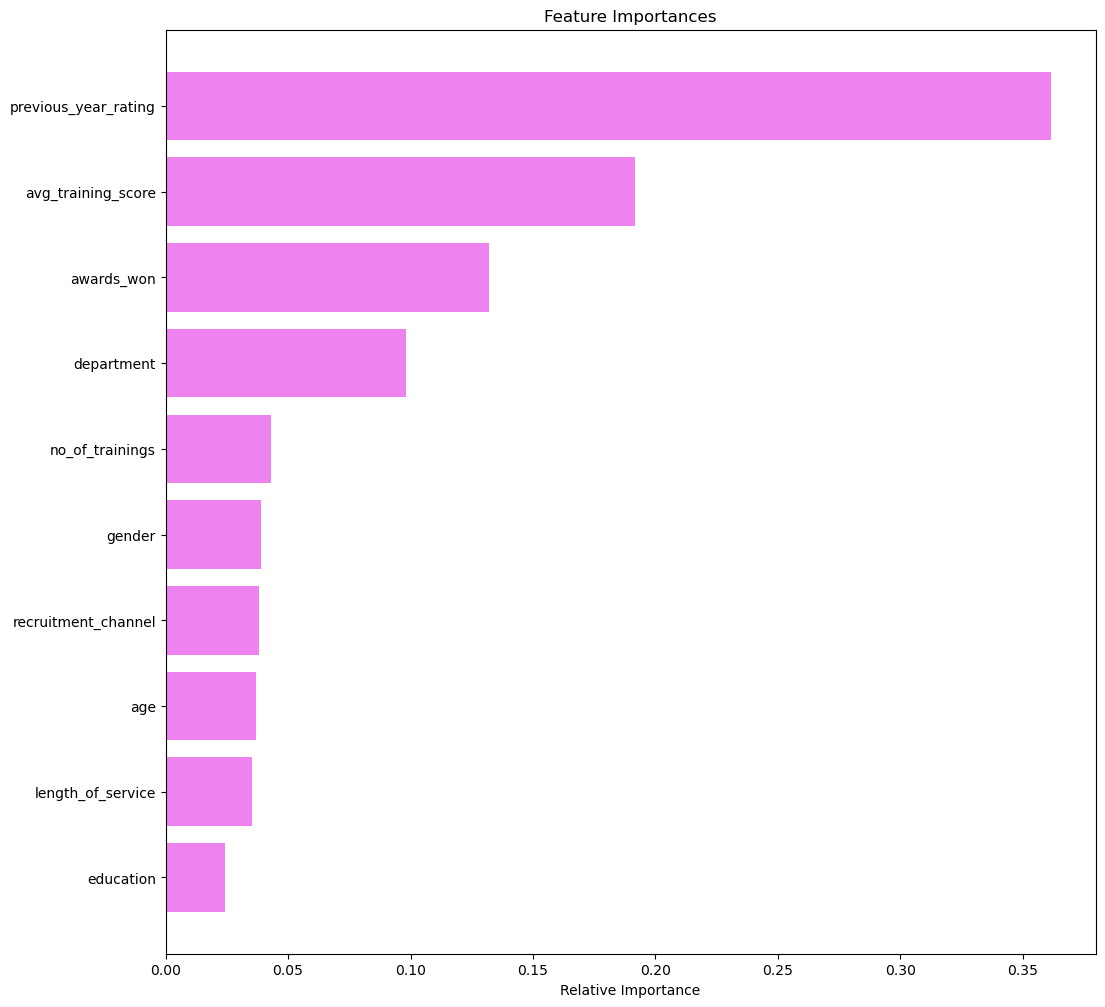

In [117]:
feature_names = X_train.columns
importances = tuned_xgb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [118]:
# Let's check the performance on test set
xgb_test = model_performance_classification_sklearn(tuned_xgb_un, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.09652,0.99892,0.09153,0.16769


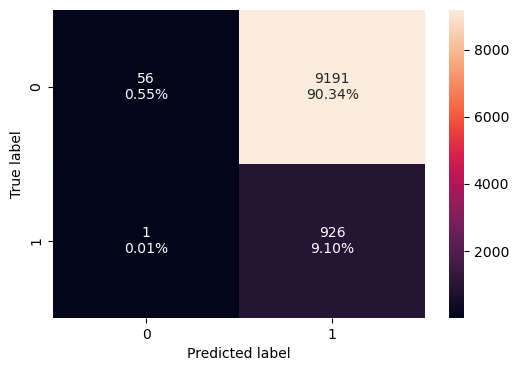

In [126]:
confusion_matrix_sklearn(tuned_xgb_un,  X_test, y_test)

# Business Insights and Conclusions

-


***